In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
# import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,
                             plot_confusion_matrix,
                             classification_report)
from sklearn.metrics import (roc_curve, roc_auc_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

# Reading dataset

In [30]:
url = "https://raw.githubusercontent.com/MpRonald/datasets/main/data_Auction_Verification.csv"
data = pd.read_csv(url)
data.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


# chance columns

In [31]:
data.columns

Index(['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
       'process.b4.capacity', 'property.price', 'property.product',
       'property.winner', 'verification.result', 'verification.time'],
      dtype='object')

In [32]:
data.columns = ['b1', 'b2', 'b3', 'b4', 'price', 'product', 'winner',
                'result', 'time']

In [33]:
data.head()

,b1,b2,b3,b4,price,product,winner,result,time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


# checking data null

In [34]:
data.isnull().sum()

b1         0
b2         0
b3         0
b4         0
price      0
product    0
winner     0
result     0
time       0
dtype: int64

# checking data duplicated

In [35]:
data.duplicated().sum()

0

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
b1,2043.0,1.000000,0.816696,0.000000,0.00000,1.000000,2.000000,2.000000
b2,2043.0,2.093979,0.811269,0.000000,1.00000,2.000000,3.000000,3.000000
b3,2043.0,1.883994,0.320310,1.000000,2.00000,2.000000,2.000000,2.000000
b4,2043.0,0.587861,0.492340,0.000000,0.00000,1.000000,1.000000,1.000000
price,2043.0,71.473324,8.048740,59.000000,65.00000,70.000000,78.000000,90.000000
product,2043.0,3.252080,1.804225,1.000000,2.00000,3.000000,5.000000,6.000000
winner,2043.0,0.455213,1.062828,0.000000,0.00000,0.000000,0.000000,4.000000
time,2043.0,7336.944574,10375.393650,77.916667,546.81891,1316.983333,10876.638889,44130.520833


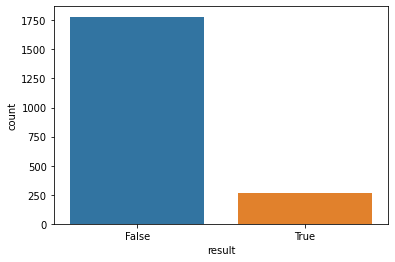

In [37]:
# plot
sns.countplot(x = data.result);

In [38]:
data.result.value_counts()

False    1781
True      262
Name: result, dtype: int64

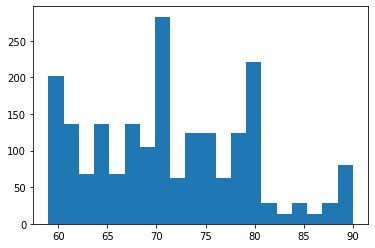

In [39]:
plt.hist(x = data.price, bins = 20);

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   b1       2043 non-null   int64  
 1   b2       2043 non-null   int64  
 2   b3       2043 non-null   int64  
 3   b4       2043 non-null   int64  
 4   price    2043 non-null   int64  
 5   product  2043 non-null   int64  
 6   winner   2043 non-null   int64  
 7   result   2043 non-null   bool   
 8   time     2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


In [43]:
data.result = data['result'].map({'False':int(0), 'True':int(1)})
data

,b1,b2,b3,b4,price,product,winner,result,time
0,0,0,2,1,59,1,0,0,163.316667
1,0,0,2,1,59,2,0,0,200.860000
2,0,0,2,1,59,4,0,0,154.888889
3,0,0,2,1,59,6,0,0,108.640000
4,0,0,2,1,60,1,0,1,85.466667
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,1,82.425000
2039,2,3,2,1,90,5,1,1,1316.983333
2040,2,3,2,1,90,5,2,0,9365.450000
2041,2,3,2,1,90,5,3,0,8474.025000


In [44]:
# checking unique values in target variable
data.result.unique()

array([0, 1])

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   b1       2043 non-null   int64  
 1   b2       2043 non-null   int64  
 2   b3       2043 non-null   int64  
 3   b4       2043 non-null   int64  
 4   price    2043 non-null   int64  
 5   product  2043 non-null   int64  
 6   winner   2043 non-null   int64  
 7   result   2043 non-null   int64  
 8   time     2043 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 143.8 KB


In [50]:
# checking multicollinearity among numerical variables
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
X_variables = data
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [52]:
# result
vif_data

,feature,VIF
0,b1,3.569492
1,b2,7.370882
2,b3,35.456267
3,b4,2.606412
4,price,43.535838
5,product,5.492402
6,winner,1.322453
7,result,1.317248
8,time,2.480410


In [53]:
# correlation
data.corr()

,b1,b2,b3,b4,price,product,winner,result,time
b1,1.000000,0.084260,0.443671,-0.052370,0.285558,0.068131,-0.121864,-0.120126,0.398359
b2,0.084260,1.000000,-0.025869,-0.069726,0.035033,-0.099167,-0.049640,-0.044442,0.042732
b3,0.443671,-0.025869,1.000000,-0.079735,0.189417,-0.022250,-0.096544,-0.071344,0.240032
b4,-0.052370,-0.069726,-0.079735,1.000000,0.098808,0.118117,0.105088,0.008864,0.044963
price,0.285558,0.035033,0.189417,0.098808,1.000000,-0.019990,0.222108,0.211760,0.078056
product,0.068131,-0.099167,-0.022250,0.118117,-0.019990,1.000000,0.066033,0.036485,-0.416841
winner,-0.121864,-0.049640,-0.096544,0.105088,0.222108,0.066033,1.000000,0.214558,-0.104274
result,-0.120126,-0.044442,-0.071344,0.008864,0.211760,0.036485,0.214558,1.000000,-0.232090
time,0.398359,0.042732,0.240032,0.044963,0.078056,-0.416841,-0.104274,-0.232090,1.000000


# data preparing

In [57]:
X = data.drop(['result'], axis=1).values
X

array([[0.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.63316667e+02],
       [0.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
        2.00000000e+00, 0.00000000e+00, 2.00860000e+02],
       [0.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
        4.00000000e+00, 0.00000000e+00, 1.54888889e+02],
       ...,
       [2.00000000e+00, 3.00000000e+00, 2.00000000e+00, ...,
        5.00000000e+00, 2.00000000e+00, 9.36545000e+03],
       [2.00000000e+00, 3.00000000e+00, 2.00000000e+00, ...,
        5.00000000e+00, 3.00000000e+00, 8.47402500e+03],
       [2.00000000e+00, 3.00000000e+00, 2.00000000e+00, ...,
        5.00000000e+00, 4.00000000e+00, 8.20083333e+01]])

In [60]:
y = data['result'].values

In [61]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [62]:
scaler = StandardScaler()  
scaler.fit(X)
X = scaler.transform(X)
X.shape

(2043, 8)

In [63]:
X.shape, y.shape

((2043, 8), (2043,))

In [64]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=123)

In [67]:
X_train.shape, y_train.shape

((1634, 8), (1634,))

In [68]:
X_test.shape, y_test.shape

((409, 8), (409,))

# Linear Regression Classifier

In [72]:
def run_log_reg(X, Y, test_x, test_y):
  """Roda Logistic Regression"""
  
  kVals_log_reg = range(1000, 5500, 500)
  accuracy = []

  # criando o classificador e treinando modelo
  # abaixo nosso código é treinado com várias iterações com as variáveis de treino
  for k in kVals_log_reg:
    lr = LogisticRegression(max_iter=k)
    lr = lr.fit(X, Y)
    
    # realizando a predição do modelo
    y_pred = lr.predict(test_x)

    # verificando acurácia do modelo
    accuracy_lr = accuracy_score(test_y, y_pred)
    print("Com valor de %d, a acurácia do modelo é: %.2f%%" % (k, accuracy_lr * 100))
    accuracy.append(accuracy_lr)

  # utilizando o classification report 
  print(classification_report(y_test, y_pred))
  
  # Obtendo o valor de k que apresentou a maior acurácia
  i = np.argmax(accuracy)
  
  print("\nO valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados!" % (kVals_log_reg[i], accuracy[i] * 100))

  print('\n***********ROC CURVE***********\n')
  prob_lr = lr.predict_proba(X_test)[:,1]
  fpr, tpr, limit = roc_curve(y_test, prob_lr) # define a curva ROC
  roc_lr = roc_auc_score(y_test, prob_lr)
  # calculo da area sobre a curva ROC
  print(f'Curva ROC: {(round(roc_lr, 3)*10)}')

  # plotando a curva ROC

  plt.subplots(1, figsize=(8,8))
  plt.title("Curva ROC Logistic Regression")
  plt.plot(fpr, tpr)
  plt.xlabel('Especificidade')
  plt.ylabel('Sensibilidade')
  plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
  plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
  plt.show()

  print('\n***********CONFUSION MATRIX***********\n')
  conf_matrix = plot_confusion_matrix(lr, X_test, y_test, cmap='Greens')

Com valor de 1000, a acurácia do modelo é: 90.46%
Com valor de 1500, a acurácia do modelo é: 90.46%
Com valor de 2000, a acurácia do modelo é: 90.46%
Com valor de 2500, a acurácia do modelo é: 90.46%
Com valor de 3000, a acurácia do modelo é: 90.46%
Com valor de 3500, a acurácia do modelo é: 90.46%
Com valor de 4000, a acurácia do modelo é: 90.46%
Com valor de 4500, a acurácia do modelo é: 90.46%
Com valor de 5000, a acurácia do modelo é: 90.46%
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       358
           1       0.83      0.29      0.43        51

    accuracy                           0.90       409
   macro avg       0.87      0.64      0.69       409
weighted avg       0.90      0.90      0.88       409


O valor de k = 1000 alcançou a mais alta acurácia de 90.46% nos dados!

***********ROC CURVE***********

Curva ROC: 8.69


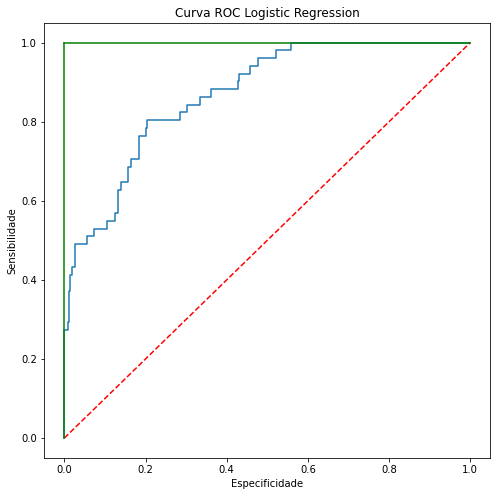


***********CONFUSION MATRIX***********



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


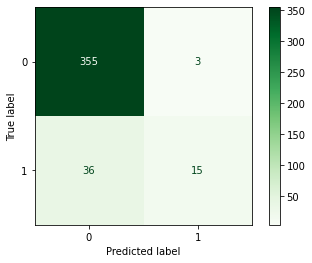

In [73]:
run_log_reg(X_train, y_train, X_test, y_test)

# Cross validation

In [74]:
def cross_validation(X, y, X_train, X_test):
  lr = LogisticRegression(max_iter=1000).fit(X, y)
  prediction = lr.predict(X_test)
  tam_i = []
  for i in prediction[1:]:
    if i == 1:
      tam_i.append(i)
  error_valid_lr = (len(tam_i))
  print(f"No conjunto de treino X com {X_train.shape[0]}, temos {error_valid_lr} dados classificados errados")

In [75]:
cross_validation(X, y, X_train, X_test)

No conjunto de treino X com 1634, temos 19 dados classificados errados


# Data balancing

In [78]:
balance = RandomUnderSampler()
X_bal, y_bal = balance.fit_resample(X, y)

In [79]:
# ver o balanceamento da variavel target
print(f'Dados balanceados: \n{pd.Series(y_bal).value_counts()}')

Dados balanceados: 
0    262
1    262
dtype: int64


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=123)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


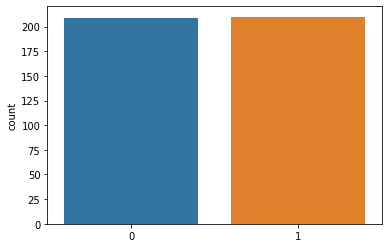

In [81]:
# plotar a nova distribuição
sns.countplot(y_train);

Com valor de 1000, a acurácia do modelo é: 75.24%
Com valor de 1500, a acurácia do modelo é: 75.24%
Com valor de 2000, a acurácia do modelo é: 75.24%
Com valor de 2500, a acurácia do modelo é: 75.24%
Com valor de 3000, a acurácia do modelo é: 75.24%
Com valor de 3500, a acurácia do modelo é: 75.24%
Com valor de 4000, a acurácia do modelo é: 75.24%
Com valor de 4500, a acurácia do modelo é: 75.24%
Com valor de 5000, a acurácia do modelo é: 75.24%
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        53
           1       0.73      0.79      0.76        52

    accuracy                           0.75       105
   macro avg       0.75      0.75      0.75       105
weighted avg       0.75      0.75      0.75       105


O valor de k = 1000 alcançou a mais alta acurácia de 75.24% nos dados!

***********ROC CURVE***********

Curva ROC: 8.62


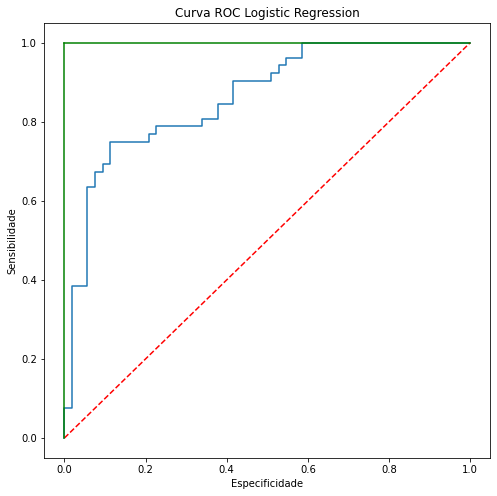


***********CONFUSION MATRIX***********



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


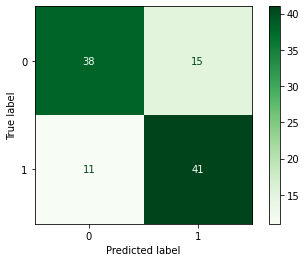

In [82]:
run_log_reg(X_train, y_train, X_test, y_test)

In [83]:
cross_validation(X, y, X_train, X_test)

No conjunto de treino X com 419, temos 17 dados classificados errados


# SOMTE method

In [85]:
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X, y)
X_smt.shape, y_smt.shape

((3562, 8), (3562,))

In [86]:
# ver o balanceamento da variavel target
print(f'Dados balanceados: \n{pd.Series(y_smt).value_counts()}')

Dados balanceados: 
0    1781
1    1781
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


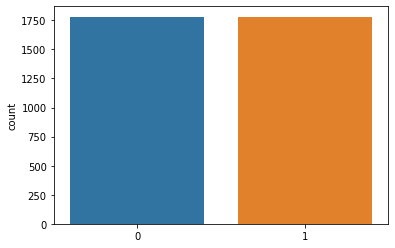

In [87]:
# plotar a nova distribuição
sns.countplot(y_smt);

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state = 123)

Com valor de 1000, a acurácia do modelo é: 77.98%
Com valor de 1500, a acurácia do modelo é: 77.98%
Com valor de 2000, a acurácia do modelo é: 77.98%
Com valor de 2500, a acurácia do modelo é: 77.98%
Com valor de 3000, a acurácia do modelo é: 77.98%
Com valor de 3500, a acurácia do modelo é: 77.98%
Com valor de 4000, a acurácia do modelo é: 77.98%
Com valor de 4500, a acurácia do modelo é: 77.98%
Com valor de 5000, a acurácia do modelo é: 77.98%
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       352
           1       0.75      0.84      0.79       361

    accuracy                           0.78       713
   macro avg       0.78      0.78      0.78       713
weighted avg       0.78      0.78      0.78       713


O valor de k = 1000 alcançou a mais alta acurácia de 77.98% nos dados!

***********ROC CURVE***********

Curva ROC: 8.55


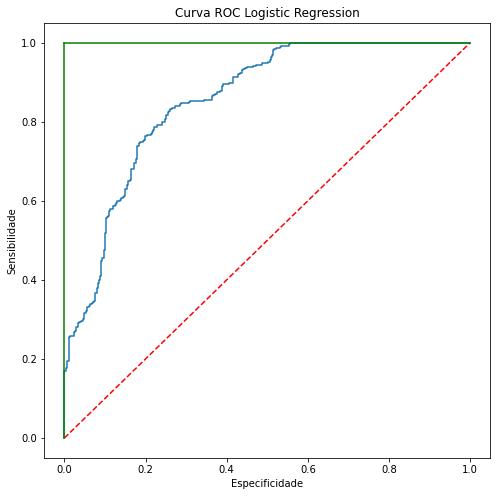


***********CONFUSION MATRIX***********



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


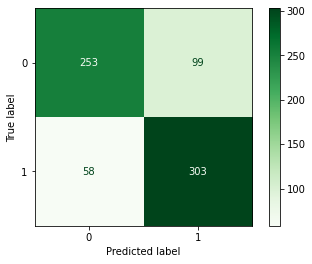

In [89]:
run_log_reg(X_train, y_train, X_test, y_test)



In [90]:
cross_validation(X, y, X_train, X_test)

No conjunto de treino X com 2849, temos 75 dados classificados errados


# Clustering

In [99]:
X.shape, y.shape

((2043, 8), (2043,))

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=123)

In [101]:
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [104]:
dataset = data.drop('result', axis=1)

In [105]:
dataset.head()

,b1,b2,b3,b4,price,product,winner,time
0,0,0,2,1,59,1,0,163.316667
1,0,0,2,1,59,2,0,200.860000
2,0,0,2,1,59,4,0,154.888889
3,0,0,2,1,59,6,0,108.640000
4,0,0,2,1,60,1,0,85.466667


In [110]:
kmeans = KMeans(n_clusters = 4, random_state = 159).fit(dataset)

In [111]:
kmeans.labels_

array([0, 0, 0, ..., 3, 3, 0], dtype=int32)

In [112]:
# creating a Cluster map
cm = pd.DataFrame(dataset)
cm['cluster'] = kmeans.labels_

In [113]:
cm.head(10)

,b1,b2,b3,b4,price,product,winner,time,cluster
0,0,0,2,1,59,1,0,163.316667,0
1,0,0,2,1,59,2,0,200.860000,0
2,0,0,2,1,59,4,0,154.888889,0
3,0,0,2,1,59,6,0,108.640000,0
4,0,0,2,1,60,1,0,85.466667,0
5,0,0,2,1,60,1,3,82.000000,0
6,0,0,2,1,60,1,4,154.250000,0
7,0,0,2,1,60,2,0,80.950000,0
8,0,0,2,1,60,2,3,78.000000,0
9,0,0,2,1,60,2,4,197.010000,0


In [117]:
for i in range(0,4):
  print(f'Cluter = {i}: | Nº de Cluster:{len(cm[cm.cluster == i])}')

Cluter = 0: | Nº de Cluster:1332
Cluter = 1: | Nº de Cluster:203
Cluter = 2: | Nº de Cluster:220
Cluter = 3: | Nº de Cluster:288


In [118]:
# reducing dimensionality
pca = PCA(n_components = 2).fit_transform(dataset)
len(pca)

2043

In [119]:
# Determinando um range de K
k_range = range(1,12)

# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [120]:
# Determinando um range de K
k_range = range(1,12)

# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [122]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [123]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [124]:
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]
soma_total

219818971196.5734

In [125]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

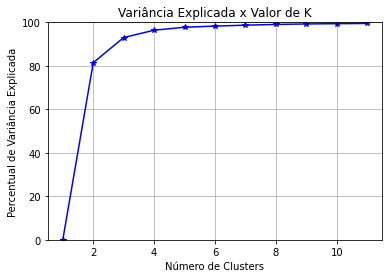

In [126]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [127]:
# Criando um modelo com K = 3
modelo_v1 = KMeans(n_clusters = 3)
modelo_v1.fit(pca)

KMeans(n_clusters=3)

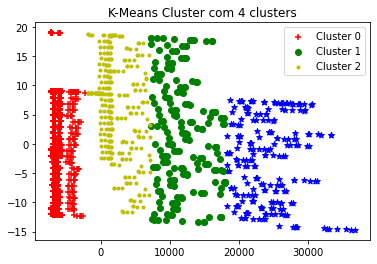

In [131]:
# generating 'labels' to clusters results
for i in range(0, pca.shape[0]):
  if kmeans.labels_[i] == 0:
    c1 = pl.scatter(pca[i,0], pca[i,1], c = 'r', marker = '+')
  elif kmeans.labels_[i] == 1:
    c2 = pl.scatter(pca[i,0], pca[i,1], c = 'g', marker = 'o')
  elif kmeans.labels_[i] == 2:
    c3 = pl.scatter(pca[i,0], pca[i,1], c = 'b', marker = '*')
  elif kmeans.labels_[i] == 3:
    c3 = pl.scatter(pca[i,0], pca[i,1], c = 'y', marker = '.')
    pl.legend([c1,c2,c3], ['Cluster 0', 'Cluster 1', 'Cluster 2'])
    pl.title("K-Means Cluster com 4 clusters")
pl.show()

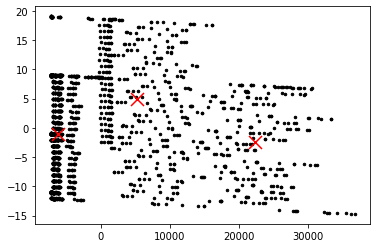

In [134]:
# Plot dos centróides
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 5)
centroids = modelo_v1.cluster_centers_
inert = modelo_v1.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169,
            linewidths = 4, color = 'r', zorder = 8)
plt.show()

In [135]:
# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.7833746705749037

In [136]:
# Criando um modelo com K = 6
k = range(2,11)
sil = []
for i in k:
  modelo = KMeans(n_clusters = i)
  modelo.fit(pca)
  # Silhouette Score
  labels = modelo.labels_
  val = silhouette_score(pca, labels, metric = 'euclidean')
  sil.append(val)
  print(i,val)
j = np.argmax(val)
print("\nO valor de k = %d,  tem a melhor silhuette com %.2f%% \n" % (k[j], sil[j] * 100))

2 0.7887929989238746
3 0.7833746705749037
4 0.7800128078877858
5 0.7759136280873021
6 0.7608063417674858
7 0.7153217419045627
8 0.7159459869429851
9 0.7178211626030214
10 0.7136682969986962

O valor de k = 2,  tem a melhor silhuette com 78.88% 

